In [1]:
from sampling import *
from feature_extracter import *
from sklearn.preprocessing import StandardScaler
from ML_models import *

2025-03-09 11:27:21.794290: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 11:27:21.797277: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 11:27:21.804925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741516041.819321   33962 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741516041.823952   33962 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 11:27:21.841139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('task/train_set/x_train_aggregated.csv') # Replace with your file path
x = df.drop(columns=['AccountID'])
y_df = pd.read_csv('task/train_set/y_train.csv')
df['Fraudster'] = y_df['Fraudster']

df_val = pd.read_csv('task/validation_set/x_val_aggregated.csv')
x_val = df_val.drop(columns=['AccountID'])
yval_df = pd.read_csv('task/validation_set/y_val.csv')
df_val['Fraudster'] = yval_df['Fraudster']
y_val = yval_df['Fraudster']
# Display the first few rows
# print(df.head())

test_df = pd.read_csv('task/test_set/x_test.csv')
test_agg_df = pd.read_csv('task/test_set/x_test_aggregated.csv')

# Check the distribution of the target variable (Fraudster)
# print(df_val['Fraudster'].value_counts())

In [3]:
xtrain_df = pd.read_csv('task/train_set/x_train.csv')
x_val_df = pd.read_csv('task/validation_set/x_val.csv')


In [4]:
# feature_extractor = FraudDetectionFeatureExtractor(test_df)

# aggregated_features = feature_extractor.extract_all_features()


In [5]:
# aggregated_features.to_csv('X_test_aggregated_features.csv', index=True)

In [6]:

df_fe = pd.read_csv("aggregated_features.csv")
df_fea = pd.merge(df, df_fe, on='AccountID', how='inner')  # 'inner', 'left', 'right', or 'outer'
print("df_val_fea shape:", df_fea.shape)
df_fea['Fraudster'] = y_df['Fraudster']

df_val_fe = pd.read_csv('X_val_aggregated_features.csv')
df_val_fea = pd.merge(df_val, df_val_fe, on='AccountID', how='inner') 
df_val_fea['Fraudster'] = yval_df['Fraudster']

df_test_fe = pd.read_csv('X_test_aggregated_features.csv')
df_test_fea = pd.merge(test_agg_df, df_test_fe, on='AccountID', how='inner') 
print("df_val_fea shape:", df_test_fea.shape)

df_val_fea shape: (11061, 30)
df_val_fea shape: (11060, 29)


In [7]:
y_df.head()

,AccountID,Fraudster
0,C4133222161,0
1,C8665070455,0
2,C9148601312,0
3,C1221811177,0
4,C5209415529,0


In [8]:
df_fea.head()

,AccountID,NumTransactions,AvgAmount,MaxAmount,TotalIn,MaxIn,TotalOut,MaxCashOut,MaxDebit,MaxTransfer,...,TransactionAmountRatio_mean,TransactionFrequencyPerHour_mean,TransactionBurstiness_mean,IsUnusualTransactionType_sum,IsExternalAccount_sum,ExternalAccountFrequency_mean,isUnauthorizedOverdraft_sum,OverdraftFrequency_mean,RollingAverageAmount_mean,RollingTransactionCount_mean
0,C0001143040,562,146658.532989,3585064.01,35124031.74,424498.32,47298063.80,284531.00,8893.26,3585064.01,...,1.0,5.718861,211.339858,4,182,1252.549451,0,0.0,147735.546653,9.919929
1,C0001332727,178,128888.997753,903276.53,13396604.25,341238.53,9545637.35,258056.33,0.00,903276.53,...,1.0,2.280899,40.780899,0,42,14.119048,0,0.0,132685.628566,9.747191
2,C0002641069,56,146342.356786,2571512.49,4547603.60,293992.40,3647568.38,204095.40,3594.16,2571512.49,...,1.0,1.142857,1.946429,1,16,4529.437500,0,0.0,146934.987155,9.196429
3,C0002967890,103,117303.432330,3554689.54,3016367.57,392633.82,9065885.96,247445.60,23100.20,3554689.54,...,1.0,1.757282,17.271845,0,52,2224.230769,0,0.0,115125.724512,9.563107
4,C0003513711,50,144333.040800,1563406.66,4462829.33,264727.14,2753822.71,142728.98,3080.34,1563406.66,...,1.0,1.240000,4.040000,3,7,701.142857,0,0.0,134165.598101,9.100000


In [9]:
# df_fea = df_fea.dropna(axis=1)
# df_val_fea = df_val_fea.dropna(axis=1)
for column in df_fea.columns:
    if df_fea[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_fea[column] = df_fea[column].fillna(df_fea[column].mean())

for column in df_val_fea.columns:
    if df_val_fea[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_val_fea[column] = df_val_fea[column].fillna(df_val_fea[column].mean())

for column in df_test_fea.columns:
    if df_test_fea[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_test_fea[column] = df_test_fea[column].fillna(df_test_fea[column].mean())

for column in df_fe.columns:
    if df_fe[column].isnull().sum() > 0:  # Check if the column has NaN values
        df_fe[column] = df_fe[column].fillna(df_fe[column].mean())


In [10]:
# print(df_fea.isnull().sum())
print(df_test_fea.isnull().sum())

AccountID                           0
NumTransactions                     0
AvgAmount                           0
MaxAmount                           0
TotalIn                             0
MaxIn                               0
TotalOut                            0
MaxCashOut                          0
MaxDebit                            0
MaxTransfer                         0
MaxPayment                          0
MaxFreqH                            0
MaxFreqD                            0
HourOfDay_mean                      0
DayOfWeek_mean                      0
TimeSinceLastTransaction_mean       0
BalanceChangeRatio_mean             0
BalanceDeviation_mean               0
TransactionAmountDeviation_mean     0
TransactionAmountRatio_mean         0
TransactionFrequencyPerHour_mean    0
TransactionBurstiness_mean          0
IsUnusualTransactionType_sum        0
IsExternalAccount_sum               0
ExternalAccountFrequency_mean       0
isUnauthorizedOverdraft_sum         0
OverdraftFre

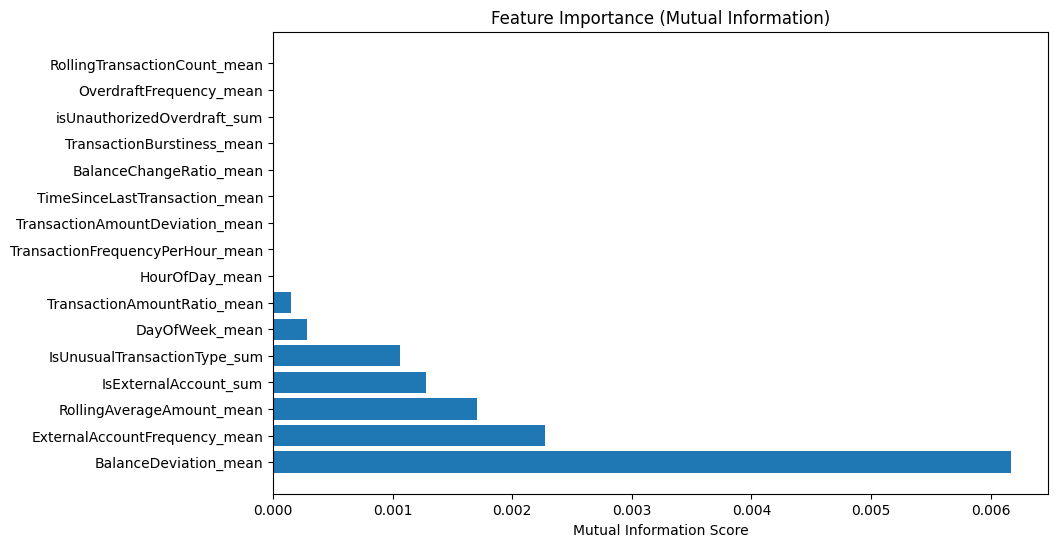

Top Features (Mutual Information): ['BalanceDeviation_mean', 'ExternalAccountFrequency_mean', 'RollingAverageAmount_mean', 'IsExternalAccount_sum', 'IsUnusualTransactionType_sum', 'DayOfWeek_mean', 'TransactionAmountRatio_mean', 'HourOfDay_mean', 'TransactionFrequencyPerHour_mean', 'TransactionAmountDeviation_mean']


In [11]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt


X = df_fe.drop(columns=['AccountID'])
y = df_fea['Fraudster']
# Calculate Mutual Information scores
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to store feature names and their MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Plot the MI scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'])
plt.xlabel('Mutual Information Score')
plt.title('Feature Importance (Mutual Information)')
plt.show()

# Select top k features
k = 10 # Number of top features to select
top_features_mi = mi_df['Feature'][:k].tolist()
print("Top Features (Mutual Information):", top_features_mi)

In [12]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)

# Fit the model
model.fit(X, y)

# Get coefficients
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Select features with non-zero coefficients
selected_features_l1 = coef_df[coef_df['Coefficient'] != 0]['Feature'].tolist()
print("Selected Features (L1 Regularization):", selected_features_l1)

Selected Features (L1 Regularization): ['IsUnusualTransactionType_sum', 'TransactionBurstiness_mean', 'isUnauthorizedOverdraft_sum', 'OverdraftFrequency_mean', 'RollingAverageAmount_mean', 'BalanceChangeRatio_mean', 'ExternalAccountFrequency_mean', 'TimeSinceLastTransaction_mean', 'IsExternalAccount_sum', 'RollingTransactionCount_mean', 'HourOfDay_mean', 'DayOfWeek_mean']


In [13]:
# Combine selected features from all methods
# selected_features = list(set(top_features_mi + selected_features_l1))


# Find common features between the two lists
selected_features = list(set(top_features_mi).intersection(selected_features_l1))
print("Final Selected Features:", selected_features)

Final Selected Features: ['HourOfDay_mean', 'RollingAverageAmount_mean', 'IsUnusualTransactionType_sum', 'DayOfWeek_mean', 'IsExternalAccount_sum', 'ExternalAccountFrequency_mean']


In [14]:
selected_features = top_features_mi + x.columns.tolist()
selected_features

['BalanceDeviation_mean',
 'ExternalAccountFrequency_mean',
 'RollingAverageAmount_mean',
 'IsExternalAccount_sum',
 'IsUnusualTransactionType_sum',
 'DayOfWeek_mean',
 'TransactionAmountRatio_mean',
 'HourOfDay_mean',
 'TransactionFrequencyPerHour_mean',
 'TransactionAmountDeviation_mean',
 'NumTransactions',
 'AvgAmount',
 'MaxAmount',
 'TotalIn',
 'MaxIn',
 'TotalOut',
 'MaxCashOut',
 'MaxDebit',
 'MaxTransfer',
 'MaxPayment',
 'MaxFreqH',
 'MaxFreqD']

In [15]:
# Select columns from the DataFrame
df_fea_con = df_fea[selected_features + ['AccountID', 'Fraudster']]

df_val_fea_con = df_val_fea[selected_features+ ['AccountID', 'Fraudster']]

X = df_fea[selected_features]
y = df_fea[ 'Fraudster']

x_val = df_val_fea_con[selected_features]
y_val = df_val_fea['Fraudster']

X_test = df_test_fea[selected_features]

In [16]:
x_val

,BalanceDeviation_mean,ExternalAccountFrequency_mean,RollingAverageAmount_mean,IsExternalAccount_sum,IsUnusualTransactionType_sum,DayOfWeek_mean,TransactionAmountRatio_mean,HourOfDay_mean,TransactionFrequencyPerHour_mean,TransactionAmountDeviation_mean,...,MaxAmount,TotalIn,MaxIn,TotalOut,MaxCashOut,MaxDebit,MaxTransfer,MaxPayment,MaxFreqH,MaxFreqD
0,-1.034803e-10,12.666667,59917.466194,3,0,3.888889,1.0,16.222222,1.000000,-2.587007e-11,...,1058446.82,54256.00,42573.79,1532696.14,145379.66,0.00,1058446.82,12128.38,1,3
1,2.893752e-10,538.777778,144767.869011,18,2,2.771429,1.0,17.014286,1.742857,-1.663076e-11,...,1248492.31,3867780.78,227336.86,6069615.63,207700.63,5835.77,1248492.31,16628.36,4,12
2,3.157026e-10,13.111111,113261.450988,18,1,2.983051,1.0,17.932203,1.711864,-1.973141e-12,...,371757.14,2983503.73,371757.14,3278407.64,272880.09,0.00,210236.70,24831.23,3,9
3,1.164153e-10,1879.800000,41164.277476,5,0,3.000000,1.0,16.125000,1.000000,0.000000e+00,...,89404.72,89404.72,89404.72,148123.34,73175.44,5848.06,0.00,13113.74,1,3
4,-3.053517e-11,288.810811,91579.664058,37,4,2.934426,1.0,17.950820,1.524590,-8.349460e-12,...,333065.87,1541178.32,333065.87,1537166.48,213106.08,11822.80,0.00,17461.74,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11055,0.000000e+00,15.250000,177989.682251,4,0,3.125000,1.0,16.750000,1.000000,5.820766e-11,...,3147477.20,186040.79,180097.14,3873495.54,248744.81,0.00,3147477.20,8948.44,1,2
11056,-1.506551e-11,13.475000,122976.746088,40,0,2.905882,1.0,16.852941,2.564706,8.645550e-12,...,1405874.29,11898653.45,328177.62,9209978.16,334838.56,0.00,1405874.29,28721.52,8,33
11057,-3.233759e-11,6.250000,141382.532635,4,0,2.444444,1.0,17.222222,1.222222,0.000000e+00,...,657024.25,1706268.38,223176.35,1245288.87,118003.63,0.00,657024.25,0.00,2,4
11058,7.761021e-11,4748.400000,140291.120281,10,1,2.972222,1.0,18.194444,1.166667,1.576457e-11,...,977416.10,2009299.75,287059.94,2795881.44,183754.47,1552.55,977416.10,15350.64,2,5


In [17]:
print(x_val.describe())

       BalanceDeviation_mean  ExternalAccountFrequency_mean  \
count           1.106000e+04                   11060.000000   
mean            1.135219e-12                     847.884902   
std             2.436323e-10                    2686.560728   
min            -1.241763e-09                       1.000000   
25%            -1.325988e-10                      14.305254   
50%             0.000000e+00                     147.960868   
75%             1.372502e-10                     651.500000   
max             1.862645e-09                   47348.000000   

       RollingAverageAmount_mean  IsExternalAccount_sum  \
count               1.106000e+04           11060.000000   
mean                1.499223e+05              52.304611   
std                 9.193310e+04             581.373159   
min                 3.149972e+03               0.000000   
25%                 1.251959e+05              10.000000   
50%                 1.429149e+05              31.000000   
75%                

In [18]:
import numpy as np
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

/tmp/ipykernel_33962/1452192862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.replace([np.inf, -np.inf], np.nan, inplace=True)


In [19]:
# print(X_test[X_test > 1e10].count())

In [20]:
# print(X_test.describe())

In [21]:
# Initialize the MLModels class
ml_models = MLModels(X, y, x_val, y_val)

# Train and evaluate models
# ml_models.logistic_regression()

In [22]:
# ml_models.decision_tree()

In [23]:
# ml_models.random_forest()

In [24]:
# ml_models.gradient_boosting()

In [25]:
# ml_models.knn()

In [26]:
# ml_models.svm()

In [27]:
# ml_models.naive_bayes()

In [28]:
# ml_models.xgboost()

In [29]:
# ml_models.lightgbm()

In [30]:
# from sklearn.ensemble import VotingClassifier

# # Initialize the two models
# model1 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model2 = GaussianNB()  # Model with high accuracy for class 1

# # Create a Voting Classifier
# voting_clf = VotingClassifier(estimators=[
#     ('model1', model1),
#     ('model2', model2)
# ], voting='soft')  # Use 'soft' for weighted probabilities

# # Train the Voting Classifier
# voting_clf.fit(X, y)

# # Evaluate the Voting Classifier
# y_pred = voting_clf.predict(x_val)
# y_pred_proba = voting_clf.predict_proba(x_val)[:, 1]
# ml_models.evaluate_model(y_val, y_pred, y_pred_proba)

In [31]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# # Initialize the two models
# model1 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model2 = GaussianNB()  # Model with high accuracy for class 1

# # Create a Stacking Classifier
# stacking_clf = StackingClassifier(estimators=[
#     ('model1', model1),
#     ('model2', model2)
# ], final_estimator=LogisticRegression())

# # Train the Stacking Classifier
# stacking_clf.fit(X, y)

# # Evaluate the Stacking Classifier
# y_pred = stacking_clf.predict(x_val)
# y_pred_proba = stacking_clf.predict_proba(x_val)[:, 1]
# ml_models.evaluate_model(y_val, y_pred, y_pred_proba)

In [32]:
# model11 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model21 = GaussianNB()  # Model with high accuracy for class 1
# model11.fit(X,y)
# model21.fit(X,y)

# # Get predicted probabilities from both models
# y_pred_proba1 = model11.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 1
# y_pred_proba2 = model21.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 2

# # # Combine probabilities using a weighted average
# # weight1 = 0.1  # Weight for model 1
# # weight2 = 0.8  # Weight for model 2
# # combined_proba = (weight1 * y_pred_proba1) + (weight2 * y_pred_proba2)

# # # Convert probabilities to binary predictions
# # y_pred_combined = (combined_proba > 0.7).astype(int)


# # Define a custom combination rule
# y_pred_combined = []
# for pred1, pred2 in zip(y_pred_proba1, y_pred_proba2):
#     if pred1 == 0 and pred2 == 1:
#         y_pred_combined.append(1)  # Classify as class 1
#     elif pred1 == 1 and pred2 == 0:
#         y_pred_combined.append(0)  # Classify as class 0
#     else:
#         y_pred_combined.append(pred1)  # Default to Model 1's prediction


# # Evaluate the combined predictions
# ml_models.evaluate_model(y_val, y_pred_combined)

In [33]:
# from sklearn.linear_model import LogisticRegression
# model11 = DecisionTreeClassifier(random_state=42)# Model with high accuracy for class 0
# model21 = GaussianNB()  # Model with high accuracy for class 1
# model11.fit(X,y)
# model21.fit(X,y)

# # Get predicted probabilities from both models
# y_pred_proba1 = model11.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 1
# y_pred_proba2 = model21.predict_proba(x_val)[:, 1]  # Probabilities for class 1 from model 2

# # Combine probabilities into a new feature matrix
# X_blend = pd.DataFrame({'Model1_Proba': y_pred_proba1, 'Model2_Proba': y_pred_proba2})

# # Train a blending model (e.g., Logistic Regression)
# blending_model = LogisticRegression()
# blending_model.fit(X_blend, y_val)

# # Make predictions using the blending model
# y_pred_blend = blending_model.predict(X_blend)
# y_pred_proba_blend = blending_model.predict_proba(X_blend)[:, 1]

# # Evaluate the blending model
# ml_models.evaluate_model(y_val, y_pred_blend, y_pred_proba_blend)

In [34]:
fraud_detector = FraudDetection(df_fea_con,df_val_fea_con)

# input_shape = X_unde.shape[1]  # Number of features
# model = build_nn_model(input_shape)
# Compare all approaches
# fraud_detector.compare_approaches()

In [35]:
# fraud_detector = FraudDetection(df_fea_con,df_val_fea_con)
# fraud_detector.preprocess_data()
# scaler = StandardScaler()


# # Generate oversampled data
# X_train_smote, y_train_smote = fraud_detector.oversample_data()
# X_scaled = scaler.fit_transform(x_val)
# x_val = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns)
# input_shape = X_train_smote.shape[1]
# # Train and evaluate the model using oversampled data
# fraud_detector.NN_train_and_evaluate_model(input_shape,X_train_smote, y_train_smote, x_val, y_val, "Oversampling (SMOTE)",epochs=50, batch_size=32)

In [36]:
fraud_detector = FraudDetection(df_fea_con,df_val_fea_con)
fraud_detector.preprocess_data()
scaler = StandardScaler()


# Generate oversampled data
X_train_smote, y_train_smote = fraud_detector.oversample_data()
X_scaled = scaler.fit_transform(x_val)
x_val = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns)
input_shape = X_train_smote.shape[1]

model_N = fraud_detector.build_nn_model(input_shape)
model_NN = fraud_detector.build_nn_dense_model(input_shape)
history1 = model_N.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
history2 = model_NN.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
y_pred_smote_N = model_N.predict(x_val)

y_pred_smote_NN = model_NN.predict(x_val)

X_train_under, y_train_under = fraud_detector.undersample_data()
input_shape = X_train_under.shape[1]
model_NU = fraud_detector.build_nn_model(input_shape)
model_NNU = fraud_detector.build_nn_dense_model(input_shape)
history1U = model_NU.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
history2U = model_NNU.fit(X_train_smote, y_train_smote, epochs=30, batch_size=32, verbose=1)
y_pred_under_NU = model_NU.predict(x_val)

y_pred_under_NNU = model_NNU.predict(x_val)


/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


2025-03-09 11:27:27.758523: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.4913 - loss: 0.7222
Epoch 2/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.5246 - loss: 0.6934
Epoch 3/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.5205 - loss: 0.6931
Epoch 4/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.5397 - loss: 0.6901
Epoch 5/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5466 - loss: 0.6892
Epoch 6/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.5450 - loss: 0.6869
Epoch 7/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.5455 - loss: 0.6860
Epoch 8/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5545 - loss: 0.6834
Epoch 9/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.5532 - loss: 0.6841
Epoch 10/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5505 - loss: 0.6846
Epoch 11/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.5586 - loss: 0.6828
Epoch 12/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 

/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.5050 - loss: 0.7278
Epoch 2/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.5272 - loss: 0.6932
Epoch 3/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.5343 - loss: 0.6899
Epoch 4/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.5450 - loss: 0.6868
Epoch 5/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.5514 - loss: 0.6863
Epoch 6/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.5442 - loss: 0.6876
Epoch 7/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5486 - loss: 0.6840
Epoch 8/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.5611 - loss: 0.6821
Epoch 9/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5594 - loss: 0.6835
Epoch 10/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.5642 - loss: 0.6817
Epoch 11/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.5703 - loss: 0.6785
Epoch 12/30
583/583 ━━━━━━━━━━━━━━━━━━━━ 

Confusion Matrix:
 [[6307 3101]
 [1096  556]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75      9408
           1       0.15      0.34      0.21      1652

    accuracy                           0.62     11060
   macro avg       0.50      0.50      0.48     11060
weighted avg       0.75      0.62      0.67     11060

ROC-AUC Score: 0.49788090554018216


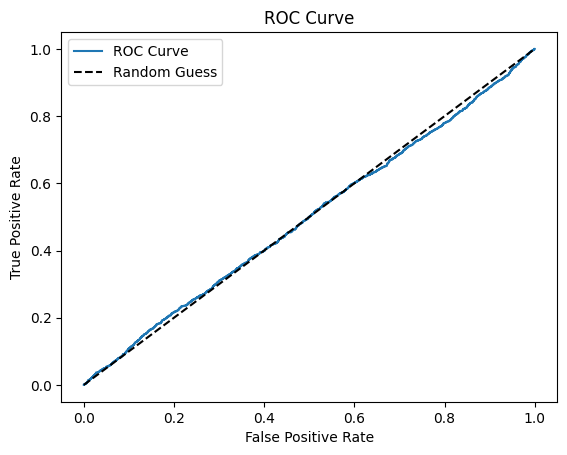

In [37]:
# Average the predictions
combined_proba = (y_pred_smote_N +  y_pred_under_NU + y_pred_smote_NN +  y_pred_under_NNU) / 4

# Convert probabilities to binary predictions
y_pred_combined = (combined_proba >= 0.5).astype(int)

# Evaluate the combined predictions
ml_models.evaluate_model(y_val, y_pred_combined, combined_proba)

In [38]:
# X_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

yt_pred_smote_N = model_N.predict(X_test)
yt_pred_smote_NN = model_NN.predict(X_test)
yt_pred_under_NU = model_NU.predict(X_test)
yt_pred_under_NNU = model_NNU.predict(X_test)

346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


In [39]:
yt_pred_smote_N

array([[0.660153  ],
       [0.42959702],
       [0.5058471 ],
       ...,
       [0.48097134],
       [0.3670315 ],
       [0.40645516]], dtype=float32)

In [48]:
combined_proba = (yt_pred_smote_N +  yt_pred_under_NU + yt_pred_smote_NN +  yt_pred_under_NNU) / 4

# Convert probabilities to binary predictions
y_pred_combined = (combined_proba >= 0.5).astype(int)

In [ ]:
submission_df = pd.read_csv('task/student_skeleton.csv')
# Fill the 'Fraudster' column in the skeleton file with the predicted values
submission_df['Fraudster'] = y_pred_combined

# Save the updated file for submission
submission_df.to_csv('Submission_2.csv', index=False)

In [52]:
print(submission_df['Fraudster'].value_counts())

Fraudster
0    7504
1    3556
Name: count, dtype: int64
